This notebook implements the calculations that went into producing Table 4 of the paper. These calculations use chains, selection functions, and the most complex likelihood form used in the paper. As such, this demonstrates a lot of the code usage, and allows one to reproduce the basic calculations that went into the paper.

Importantly, this notebook has a few dependencies: 
- The full TNO catalog (including the flux chains) from https://github.com/bernardinelli/des_tno_catalog. A new version of the catalog, that includes the free inclinations from [Huang et al (2022)](doi.org/10.3847/1538-4365/ac559a) is included
- The `gmm_anyk` package from https://github.com/bernardinelli/gmm_anyk
- All dependencies from the likelihood software (`numpy`, `numba`, `jax`, `astropy`, `scipy`) and `getDist` for visualizing chains

In [15]:
import astropy.table as tb 
import sys
import matplotlib.pyplot as pl 
import numpy as np
tno = tb.Table.read('data/y6_goodsample_ifree.fits')
sys.path.append('../Code')
sys.path.append('../Code/Scripts')
from run_inclination_rolling import create_likelihood as cl_percomp


The following will create the joint $H_r$-$i$-$A$-$\mathbf{c}$ likelihoods for each individual dynamical subset, as well as the joint likelihood of all subsets. The selection functions have been collapsed into a logistic function for simplicity (and file size), there's no quantitative difference between this approach and using individual selection functions per object and binning. Paths assume this repository and the `des_tno_catalog` repository are on the same directory.

In [2]:
subsets = ['ckbo', 'hkbo', 'detached', 'scattering', 'trojan', 'innerbelt', 'plutino', 'mainbelt', 'twotino', 'distant', 'fivetwo', 'classical']

like_percomp = {}
for i in subsets:
	like_percomp[i], _ = cl_percomp(tno, [i], 8.2, 5.5, 'data/gmm_model.pkl.gz', '../../des_full_catalog/fluxes/', '../Selection/incperpop/')
 

unique_subsets = ['ckbo', 'hkbo', 'detached', 'scattering', 'trojan', 'innerbelt', 'plutino', 'mainbelt', 'twotino', 'fivetwo', 'distant',]
like_percomp['all'], _ = cl_percomp(tno, unique_subsets, 8.2, 5.5, 'data/gmm_model.pkl.gz', '../../des_full_catalog/fluxes', '../Selection/incperpop/')

/home/pedro/Documents/des_tno_likelihood/Notebooks/../Code/Scripts/run_inclination_rolling.py:44: RuntimeWarning: invalid value encountered in log10
  data[i]['g-r'] = -2.5*np.log10(data[i]['flux_g'] / data[i]['flux_r'])
/home/pedro/Documents/des_tno_likelihood/Notebooks/../Code/Scripts/run_inclination_rolling.py:46: RuntimeWarning: invalid value encountered in log10
  data[i]['r-z'] = -2.5*np.log10(data[i]['flux_r'] / data[i]['flux_z'])
/home/pedro/Documents/des_tno_likelihood/Notebooks/../Code/Scripts/run_inclination_rolling.py:44: RuntimeWarning: invalid value encountered in log10
  data[i]['g-r'] = -2.5*np.log10(data[i]['flux_g'] / data[i]['flux_r'])
/home/pedro/Documents/des_tno_likelihood/Notebooks/../Code/Scripts/run_inclination_rolling.py:46: RuntimeWarning: invalid value encountered in log10
  data[i]['r-z'] = -2.5*np.log10(data[i]['flux_r'] / data[i]['flux_z'])
/home/pedro/Documents/des_tno_likelihood/Notebooks/../Code/Scripts/run_inclination_rolling.py:46: RuntimeWarning: in

Now we'll load the chains, visualize them, and compute a few key numbers. For simplicity, here we will use only the chains with a shared $H_r$ distribution between NIRB and NIRF, distinct $A$ distribution between these two, as well as the cases of joint and separate $i$ distribution between the two components.

In [4]:
file = np.load('../Chains/withinclination/allpops_sharedH_withI.npz') #shared H, with different kappa per component
hmc_theta_shared = file['theta']
hmc_f_shared = file['f']

In [29]:
file = np.load('../Chains/withinclination/allpops_sharedH_sharedlogKappa_withI.npz') #shared H and kappa per component
hmc_theta_single = file['theta']
hmc_f_single = file['f']

In [30]:
np.mean(hmc_theta_shared, axis=0)

array([ 0.83769701, -0.24815416,  0.11727353,  1.05486934,  0.1524623 ,
        0.926203  ,  7.04698939,  5.19791453,  2.58393559,  3.04012264,
        2.42983698,  2.64665173,  2.68326938,  3.04554937,  2.51562592,
        3.01854256,  2.98997441,  3.02449092,  2.61939876,  3.23957928,
        2.69478821,  3.47534508,  2.93266752,  3.14905295,  2.54715241,
        2.97082862,  2.22226758,  2.62726001])

In [31]:
np.mean(hmc_theta_single, axis=0)

array([ 0.83717599, -0.24877723,  0.11736775,  1.05463516,  0.15183738,
        0.92859555,  6.98641294,  2.76595081,  2.50737175,  2.87294687,
        2.75732844,  2.88476438,  2.88608766,  3.11712723,  2.90775211,
        2.62629096,  2.42706897])

Let's visualize a few of the chains

In [9]:
from getdist import plots, MCSamples

$\theta$ vs $\theta'$

Removed no burn in


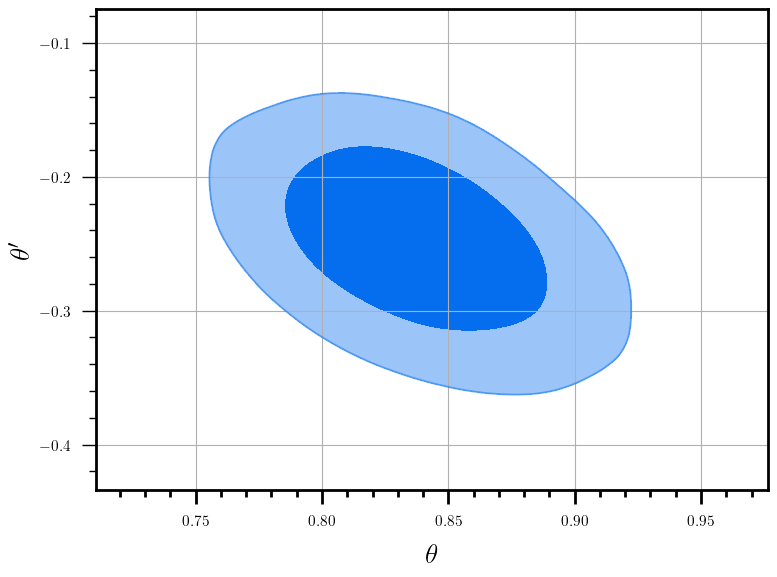

In [12]:
labels = [r'\theta', r"\theta'", r'\bar{A}',r's']
names = ['slope', 'roll', 'abar', 's']

samples_hdist_single = MCSamples(samples=hmc_theta_shared[:,:2], names = names[:2], labels = labels[:2], label='Shared')


g = plots.get_single_plotter(width_inch=8, )
g.settings.axes_labelsize = 20
g.settings.fontsize = 20
g.plot_2d([samples_hdist_single],'slope', 'roll', filled=True, colors=['xkcd:cerulean blue'],)
pl.grid()
pl.show()

$\bar{A}$ vs $s$ for the NIRB and NIRF populations. Similar to Figure 6

Removed no burn in
Removed no burn in


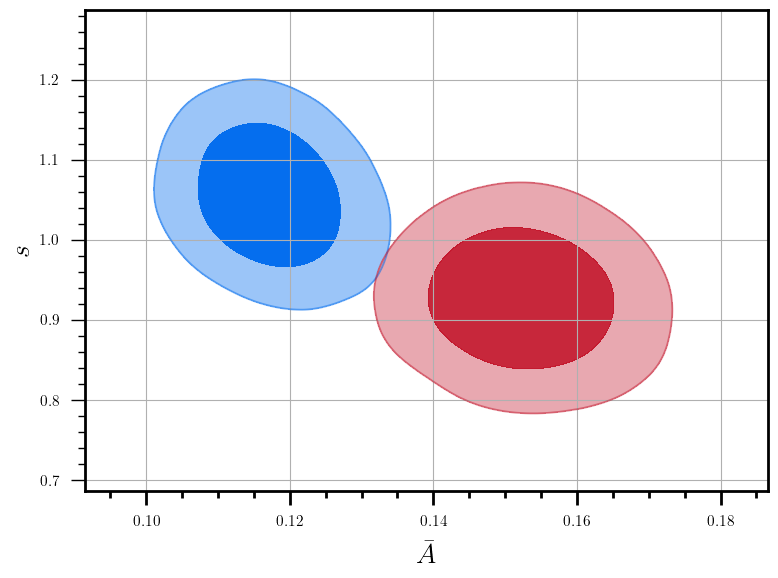

In [16]:
labels = [r'\theta', r"\theta'", r'\bar{A}',r's']
names = ['slope', 'roll', 'abar', 's']

samples_lca_nirb = MCSamples(samples=hmc_theta_shared[:,2:4], names = names[2:], labels = labels[2:], label='NIRB')
samples_lca_nirf = MCSamples(samples=hmc_theta_shared[:,4:6], names = names[2:], labels = labels[2:], label='NIRF')


g = plots.get_single_plotter(width_inch=8, )
g.settings.axes_labelsize = 20
g.settings.fontsize = 20
g.plot_2d([samples_lca_nirb, samples_lca_nirf],'abar', 's', filled=True, colors=['xkcd:cerulean blue', 'xkcd:scarlet'],)
pl.grid()
pl.show()

Now, a more complicated plot. This is the code for Figure 12 of the paper. This also demonstrates the indexing of the chains for the two cases (single vs shared $\kappa$)

In [28]:
np.mean(hmc_theta_single, axis=0)

array([ 0.83769701, -0.24815416,  0.11727353,  1.05486934,  0.1524623 ,
        0.926203  ,  7.04698939,  5.19791453,  2.58393559,  3.04012264,
        2.42983698,  2.64665173,  2.68326938,  3.04554937,  2.51562592,
        3.01854256,  2.98997441,  3.02449092,  2.61939876,  3.23957928,
        2.69478821,  3.47534508,  2.93266752,  3.14905295,  2.54715241,
        2.97082862,  2.22226758,  2.62726001])

In [32]:
labels = [r'\kappa',]
names = ['kappa']


samples_single_ckbo = MCSamples(samples=hmc_theta_single[:,6], names = names, labels = labels, label='CKBO')
samples_single_hkbo = MCSamples(samples=hmc_theta_single[:,7], names = names, labels = labels, label='HKBO')
samples_single_detached = MCSamples(samples=hmc_theta_single[:,8], names = names, labels = labels, label='Detached')
samples_single_scattering = MCSamples(samples=hmc_theta_single[:,9], names = names, labels = labels, label='Scattering')
samples_single_trojan = MCSamples(samples=hmc_theta_single[:,10], names = names, labels = labels, label='Trojan')
samples_single_inner = MCSamples(samples=hmc_theta_single[:,11], names = names, labels = labels, label='Inner belt')
samples_single_plutino = MCSamples(samples=hmc_theta_single[:,12], names = names, labels = labels, label='Plutino')
samples_single_mb = MCSamples(samples=hmc_theta_single[:,13], names = names, labels = labels, label='Main belt')
samples_single_twotino = MCSamples(samples=hmc_theta_single[:,14], names = names, labels = labels, label='Twotino')
samples_single_fivetwo = MCSamples(samples=hmc_theta_single[:,15], names = names, labels = labels, label='Five Two')
samples_single_distant = MCSamples(samples=hmc_theta_single[:,16], names = names, labels = labels, label='Distant')


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [33]:
labels = [r'\kappa_\mathrm{NIRB}', r'\kappa_\mathrm{NIR}']
names = ['kappanirb', 'kappanirf']

samples_percomp_hkbo = MCSamples(samples=hmc_theta_shared[:,8:10], names = names, labels = labels, label='HKBO')
samples_percomp_detached = MCSamples(samples=hmc_theta_shared[:,10:12], names = names, labels = labels, label='Detached')
samples_percomp_scattering = MCSamples(samples=hmc_theta_shared[:,12:14], names = names, labels = labels, label='Scattering')
samples_percomp_trojan = MCSamples(samples=hmc_theta_shared[:,14:16], names = names, labels = labels, label='Trojan')
samples_percomp_inner = MCSamples(samples=hmc_theta_shared[:,16:18], names = names, labels = labels, label='Inner belt')
samples_percomp_plutino = MCSamples(samples=hmc_theta_shared[:,18:20], names = names, labels = labels, label='Plutino')
samples_percomp_mb = MCSamples(samples=hmc_theta_shared[:,20:22], names = names, labels = labels, label='Main belt')
samples_percomp_twotino = MCSamples(samples=hmc_theta_shared[:,22:24], names = names, labels = labels, label='Twotino')
samples_percomp_fivetwo = MCSamples(samples=hmc_theta_shared[:,24:26], names = names, labels = labels, label='Five two')
samples_percomp_distant = MCSamples(samples=hmc_theta_shared[:,26:28], names = names, labels = labels, label='Distant')


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


Let's also load the chain that joins CCs and HCs into a single classical population. This file also includes different chains for the NIRB and NIRF $H_r$ distributions, which we'll ignore

In [37]:
file = np.load('../Chains/withinclination/classical_sharedH_withI.npz') #shared H and kappa per component
hmc_theta_classical = file['theta']

samples_percomp_classical = MCSamples(samples=hmc_theta_shared[:,8:10], names = names, labels = labels, label='Classical')


Removed no burn in


In [38]:
from collections import namedtuple

Density = namedtuple('Density', ['density', 'color', 'linestyle', 'fill'], defaults=['k', '--', False])

plotdata = {'ckbo' : [Density(samples_single_ckbo.get1DDensity('kappa'), linestyle='-', fill=True)], 
         'hkbo' : [Density(samples_single_hkbo.get1DDensity('kappa')), Density(samples_percomp_hkbo.get1DDensity('kappanirb'), 'xkcd:cerulean blue', '-', True),Density(samples_percomp_hkbo.get1DDensity('kappanirf'), 'xkcd:scarlet', '-', True)], 
         'detached' : [Density(samples_single_detached.get1DDensity('kappa'), linestyle='-', fill=True),  Density(samples_percomp_detached.get1DDensity('kappanirb'), 'xkcd:cerulean blue', '--'),Density(samples_percomp_detached.get1DDensity('kappanirf'), 'xkcd:scarlet', '--')],
         'scattering' : [Density(samples_single_scattering.get1DDensity('kappa'), linestyle='-', fill=True), Density(samples_percomp_scattering.get1DDensity('kappanirb'), 'xkcd:cerulean blue', '--', False),Density(samples_percomp_scattering.get1DDensity('kappanirf'), 'xkcd:scarlet', '--', False)],
         'plutino' : [Density(samples_single_plutino.get1DDensity('kappa'),), Density(samples_percomp_plutino.get1DDensity('kappanirb'), 'xkcd:cerulean blue', '-', True),Density(samples_percomp_plutino.get1DDensity('kappanirf'), 'xkcd:scarlet', '-', True)],
         'classical' : [Density(samples_percomp_classical.get1DDensity('kappanirb'), 'xkcd:cerulean blue', '--', ),Density(samples_percomp_classical.get1DDensity('kappanirf'), 'xkcd:scarlet', '--', )],
         'mainbelt' : [Density(samples_single_mb.get1DDensity('kappa')), Density(samples_percomp_mb.get1DDensity('kappanirf'), 'xkcd:scarlet', '-', True), Density(samples_percomp_mb.get1DDensity('kappanirb'), 'xkcd:cerulean blue', '-', True)], 
         'twotino' : [Density(samples_single_twotino.get1DDensity('kappa'), 'k', '-', True), Density(samples_percomp_twotino.get1DDensity('kappanirf'), 'xkcd:scarlet', ), Density(samples_percomp_twotino.get1DDensity('kappanirb'), 'xkcd:cerulean blue', )], 
         'distant' : [Density(samples_single_distant.get1DDensity('kappa'), 'k', '-', True), Density(samples_percomp_distant.get1DDensity('kappanirf'), 'xkcd:scarlet', ), Density(samples_percomp_distant.get1DDensity('kappanirb'), 'xkcd:cerulean blue', )], 
         'innerbelt' : [Density(samples_single_inner.get1DDensity('kappa'), 'k', '-', True), Density(samples_percomp_inner.get1DDensity('kappanirf'), 'xkcd:scarlet', ), Density(samples_percomp_inner.get1DDensity('kappanirb'), 'xkcd:cerulean blue', )], 
         'trojan' : [Density(samples_single_trojan.get1DDensity('kappa'), 'k', '-', True), Density(samples_percomp_trojan.get1DDensity('kappanirb'), 'xkcd:cerulean blue') , Density(samples_percomp_trojan.get1DDensity('kappanirf'), 'xkcd:scarlet', )],  
         'fivetwo' : [Density(samples_single_fivetwo.get1DDensity('kappa'), 'k', '-', True), Density(samples_percomp_fivetwo.get1DDensity('kappanirf'), 'xkcd:scarlet', ), Density(samples_percomp_fivetwo.get1DDensity('kappanirb'), 'xkcd:cerulean blue', )]}

evidences = {'scattering' : r'0.901', 'plutino' : r'2.357', 'hkbo' : r'5.448', 'detached' : r'-1.445', 'classical' : r'-76.55', 'mainbelt' : r'3.737', 'twotino' : r'-0.367', 'distant' : r'-0.128', 'innerbelt' : r'-0.409', 'trojan' : r'1.479', 'fivetwo' : '-0.752'}

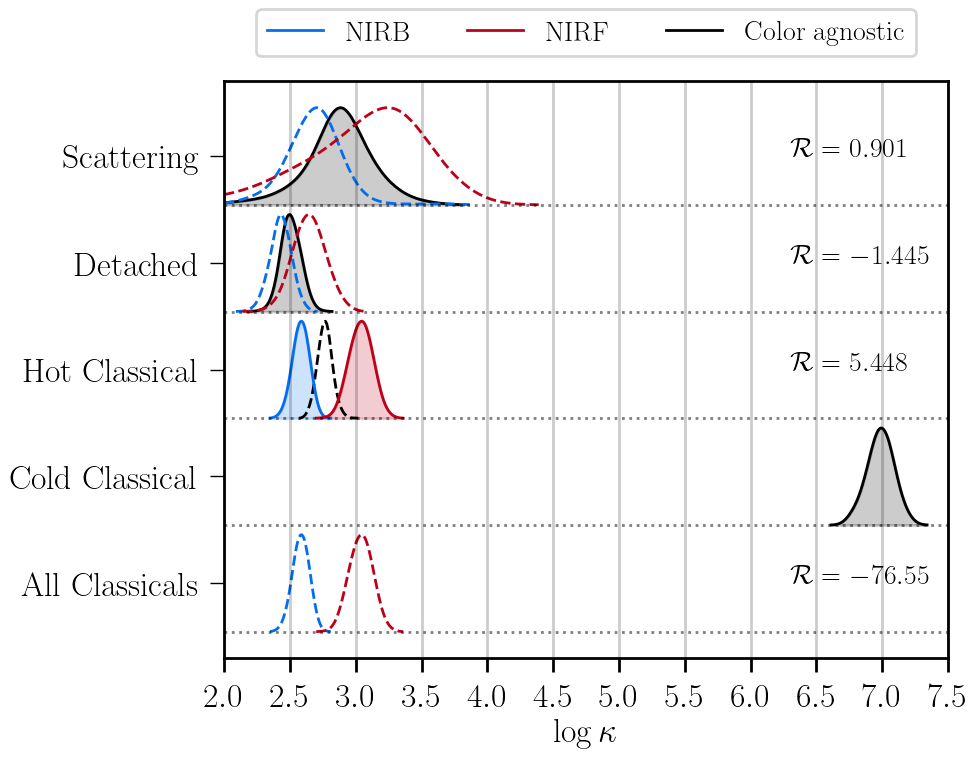

In [39]:
from matplotlib.lines import Line2D

peaks = []
kappa_range = np.arange(2, 8, 0.01)
off = 0
#evidences = {} 
for i in ['classical', 'ckbo', 'hkbo', 'detached', 'scattering',]:# 'plutino', 'mainbelt']:
    for j in plotdata[i]:
        density = j.density(kappa_range)
        msk = density>0.001
        pl.plot(kappa_range[msk], density[msk] + off, color=j.color, linestyle=j.linestyle)
        if j.fill:
            pl.fill_between(kappa_range[msk], off, density[msk] + off, alpha=0.2, color=j.color)
    pl.axhline(np.min(density + off ), alpha=0.5, color='k', linestyle=':')
    peaks.append((np.max(density) - np.min(density))/2 + off)
    if i in evidences:
        pl.text(6.3, peaks[-1], r'$\mathcal{R} = '+ evidences[i] + r'$',  fontsize=20)

    off += np.max(density+0.1)
pl.yticks(np.array(peaks),['All Classicals', 'Cold Classical','Hot Classical', 'Detached', 'Scattering'])#, 'Plutinos', 'Main Belt'])
pl.xlim(2.0,7.5)
pl.tight_layout()
pl.minorticks_off()
pl.xlabel(r'$\log \kappa$')
pl.xticks([2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5])
for i in [2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5]:
    pl.axvline(i, linestyle='-', alpha=0.2)
    
legend_elements = [Line2D([0], [0], color='xkcd:cerulean blue', label='NIRB'),
                   Line2D([0], [0], color='xkcd:scarlet', label='NIRF'),
                   Line2D([0], [0], color='k', label='Color agnostic')]
pl.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=3)
pl.tight_layout()

pl.show()


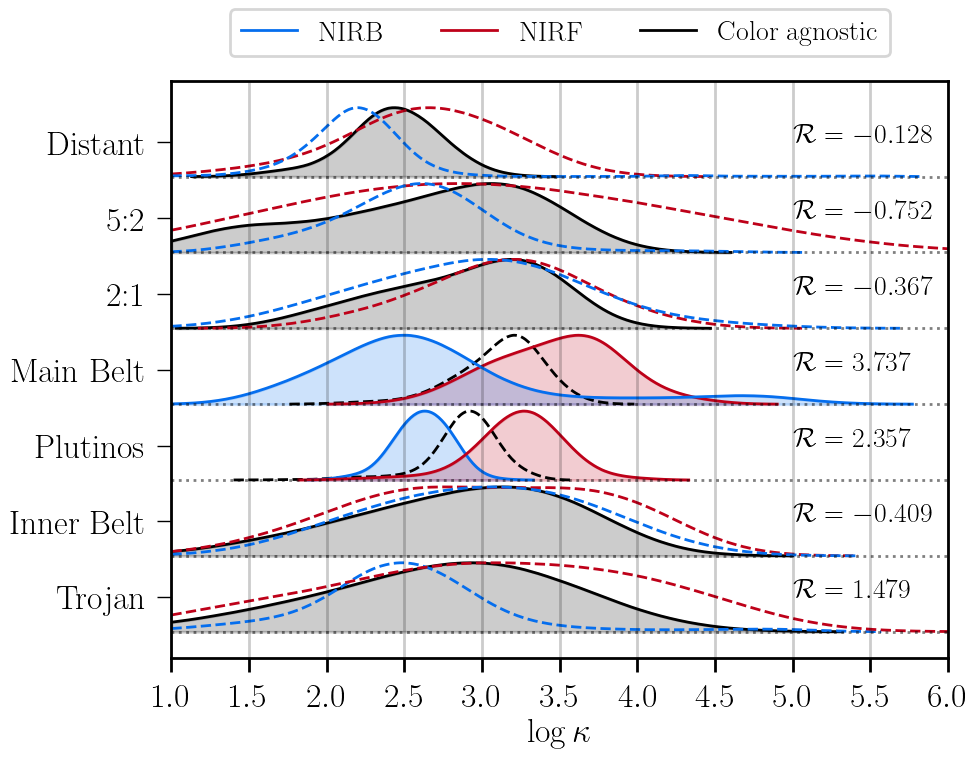

In [40]:
peaks = []
kappa_range = np.arange(1, 8, 0.01)
off = 0
#evidences = {} 
for i in ['trojan', 'innerbelt','plutino', 'mainbelt', 'twotino', 'fivetwo','distant',]:
    for j in plotdata[i]:
        density = j.density(kappa_range)
        msk = density>0.001
        pl.plot(kappa_range[msk], density[msk] + off, color=j.color, linestyle=j.linestyle)
        if j.fill:
            pl.fill_between(kappa_range[msk], off, density[msk] + off, alpha=0.2, color=j.color)
    pl.axhline(np.min(density + off ), alpha=0.5, color='k', linestyle=':')
    peaks.append((np.max(density) - np.min(density))/2 + off)
    if i in evidences:
        pl.text(5.0, peaks[-1], r'$\mathcal{R} = '+ evidences[i] + r'$',  fontsize=20)

    off += np.max(density+0.1)
pl.yticks(np.array(peaks),['Trojan', 'Inner Belt', 'Plutinos', 'Main Belt', '2:1', '5:2', 'Distant'])
pl.xlim(1.0,6)
pl.tight_layout()
pl.minorticks_off()
pl.xlabel(r'$\log \kappa$')
pl.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6,])
for i in [1, 1.5,2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]:
    pl.axvline(i, linestyle='-', alpha=0.2)
    
legend_elements = [Line2D([0], [0], color='xkcd:cerulean blue', label='NIRB'),
                   Line2D([0], [0], color='xkcd:scarlet', label='NIRF'),
                   Line2D([0], [0], color='k', label='Color agnostic')]
pl.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.15),ncol=3)
pl.tight_layout()
#pl.ylim(0, off )

pl.show()

Now, let's reproduce Table 4

In [42]:
import hmc_inclination_alternative as hinca

In [43]:
mederr = lambda x : (np.percentile(x,[50-34.1,50, 50+34.1]) - np.median(x), np.median(x))

Now, onto the mass of the KB

In [45]:
def n_obj(likelihood, ff, params):
	Hbins = np.arange(5, 9.005, 0.01)
	msk = (Hbins > 5.5) & (Hbins < 8.2)
	l = likelihood.Salpha(np.array(params), likelihood.size_dist)
	nn = np.random.poisson(likelihood.nobj)/(np.dot(ff, l)) 
	hh_nirb = hinca.rolling_slope(Hbins, params[0], params[1])/hinca.normalize_rolling(params[0], params[1])
	hh_nirf = hinca.rolling_slope(Hbins, params[4], params[5])/hinca.normalize_rolling(params[4], params[5])
 
	comb = ff[0] * hh_nirb + ff[1]*hh_nirf
	cc = np.zeros_like(comb)
	cc[msk] = comb[msk]
	summed = 0.01*np.sum(comb[1:] + comb[:-1])/2
	norm = np.sum(cc[1:] + cc[:-1]) * 0.01/2
	norm /= summed
	return nn * norm, nn * norm * ff[0], nn * norm * ff[1]

def n_obj_joint(likelihood, ff, params):
	Hbins = np.arange(5, 9.005, 0.01)
	msk = (Hbins > 5.5) & (Hbins < 8.2)
	l = likelihood.Salpha(np.array(params), likelihood.size_dist)
	nn = np.random.poisson(likelihood.nobj)/(np.dot(ff, l)) 
	hh_nirb = hinca.rolling_slope(Hbins, params[0], params[1])/hinca.normalize_rolling(params[0], params[1])
	hh_nirf = hinca.rolling_slope(Hbins, params[4], params[5])/hinca.normalize_rolling(params[4], params[5])
 
	comb = np.sum(f[::2]) * hh_nirb + np.sum(f[1::2])*hh_nirf
	cc = np.zeros_like(comb)
	cc[msk] = comb[msk]
	summed = 0.01*np.sum(comb[1:] + comb[:-1])/2
	norm = np.sum(cc[1:] + cc[:-1]) * 0.01/2
	norm /= summed
	return nn * norm, nn * norm * np.sum(f[::2]) , nn * norm * np.sum(f[1::2]) 

def mass_integral(params):
	Hbins = np.arange(5, 9.005, 0.01)
	msk = (Hbins > 5.5) & (Hbins < 8.2)
	pwr = np.power(10, -0.6*Hbins)
	hh_nirb = pwr * hinca.rolling_slope(Hbins, params[0], params[1])/hinca.normalize_rolling(params[0], params[1]) 
	hh_nirf = pwr * hinca.rolling_slope(Hbins, params[4], params[5])/hinca.normalize_rolling(params[4], params[5]) 
	mm_nirb = np.zeros_like(hh_nirb)
	mm_nirb[msk] = hh_nirb[msk]
	mm_nirf = np.zeros_like(hh_nirf)
	mm_nirf[msk] = hh_nirf[msk]
 
	mass_nirb = np.sum(mm_nirb[1:] + mm_nirb[:-1]) * 0.01/2
	mass_nirf = np.sum(mm_nirf[1:] + mm_nirf[:-1]) * 0.01/2

	return mass_nirb, mass_nirf


def n_obj_all(likelihood, ff, params):
	Hbins = np.arange(5, 12, 0.01)
	msk = (Hbins > 0) 
	l = likelihood.Salpha(np.array(params), likelihood.size_dist)
	nn = np.random.poisson(likelihood.nobj)/(np.dot(ff, l)) 
	hh_nirb = hinca.rolling_slope(Hbins, params[0], params[1])/hinca.normalize_rolling(params[0], params[1])
	hh_nirf = hinca.rolling_slope(Hbins, params[4], params[5])/hinca.normalize_rolling(params[4], params[5])
 
	comb = ff[0] * hh_nirb + ff[1]*hh_nirf
	cc = np.zeros_like(comb)
	cc[msk] = comb[msk]
	summed = 0.01*np.sum(comb[1:] + comb[:-1])/2
	norm = np.sum(cc[1:] + cc[:-1]) * 0.01/2
	norm /= summed
	return nn * norm

def n_obj_all_joint(likelihood, ff, params):
	Hbins = np.arange(5, 12, 0.01)
	msk = (Hbins > 0) 
	l = likelihood.Salpha(np.array(params), likelihood.size_dist)
	nn = np.random.poisson(likelihood.nobj)/(np.dot(ff, l)) 
	hh_nirb = hinca.rolling_slope(Hbins, params[0], params[1])/hinca.normalize_rolling(params[0], params[1])
	hh_nirf = hinca.rolling_slope(Hbins, params[4], params[5])/hinca.normalize_rolling(params[4], params[5])
 
	comb = np.sum(ff[::2]) * hh_nirb + np.sum(ff[1::2])*hh_nirf
	cc = np.zeros_like(comb)
	cc[msk] = comb[msk]
	summed = 0.01*np.sum(comb[1:] + comb[:-1])/2
	norm = np.sum(cc[1:] + cc[:-1]) * 0.01/2
	norm /= summed
	return nn * norm

def mass_integral_allsizes(params):
	Hbins = np.arange(5, 12, 0.01)
	msk = (Hbins > 0) 
	pwr = np.power(10, -0.6*Hbins)
	hh_nirb = pwr * hinca.rolling_slope(Hbins, params[0], params[1])/hinca.normalize_rolling(params[0], params[1]) 
	hh_nirf = pwr * hinca.rolling_slope(Hbins, params[4], params[5])/hinca.normalize_rolling(params[4], params[5]) 
	mm_nirb = np.zeros_like(hh_nirb)
	mm_nirb[msk] = hh_nirb[msk]
	mm_nirf = np.zeros_like(hh_nirf)
	mm_nirf[msk] = hh_nirf[msk]
 
	mass_nirb = np.sum(mm_nirb[1:] + mm_nirb[:-1]) * 0.01/2
	mass_nirf = np.sum(mm_nirf[1:] + mm_nirf[:-1]) * 0.01/2

	return mass_nirb, mass_nirf


const_K = 4 * np.pi * (1.496e11)**3 * np.power(10, 0.6 * -26.96) / 3
kg_to_earth = 1.674e-25 * 10_000 #10k conversion

In [46]:
const_K

np.float64(9.351545470378177e+17)

In [47]:
rho_nirb = 1000 #kg/m^3 
rho_nirf = 1000 #kg/m^3
nu_nirf = 0.15
nu_nirb = 0.05

In [48]:
def summary_stats(n_total, n_nirb, n_nirf, mass, mass_nirb, mass_nirf, mass_extrap):
    pc, m = mederr(n_total)
    print('N total', m, pc[0], pc[2])
    pc, m = mederr(n_nirb)
    print('N NIRB', m, pc[0], pc[2])
    pc, m = mederr(n_nirf)
    print('N NIRF', m, pc[0], pc[2])
    pc, m = mederr(mass)
    print('Mass', m, pc[0], pc[2])
    pc, m = mederr(mass_nirb)
    print('Mass NIRB', m, pc[0], pc[2])    
    pc, m = mederr(mass_nirf)
    print('Mass NIRF', m, pc[0], pc[2])
    pc, m = mederr(mass_extrap)
    print('Mass extrapolated', m, pc[0], pc[2])

In [49]:
mass_ckbo = []
n_ckbo = [] 
mass_ckbo_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100): #smaller number of realizations than in the paper -- except some noise!
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f_single[[0,1]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[6], th_s[6]]

	n, nirb, nirf = n_obj(like_percomp['ckbo'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_ckbo.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_ckbo.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['ckbo'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_ckbo_allsizes.append(mass_all)
	
	
summary_stats(n_ckbo, n_nirb, n_nirf, mass_ckbo, mass_nirb, mass_nirf, mass_ckbo_allsizes)

N total 6003.448440167669 -616.5745036625794 590.6359310899288
N NIRB 77.8072079089965 -50.7437490108576 81.77642166565991
N NIRF 5867.735290909408 -545.8357477123063 619.6413854378761
Mass 2.824249816871056 -0.3120756847348529 0.43037584541718266
Mass NIRB 0.19895491353426276 -0.1336737166274669 0.16782407926741738
Mass NIRF 2.5809699063964704 -0.27694126606568004 0.3986703372222995
Mass extrapolated 7.986356085198899 -0.882020627060057 1.3888008949913662


In [50]:
mass_hkbo = []
n_hkbo = [] 
mass_hkbo_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f[[2,3]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th[8], th[9]]

	n, nirb, nirf = n_obj(like_percomp['hkbo'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_hkbo.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_hkbo.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['hkbo'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_hkbo_allsizes.append(mass_all)
	
	
summary_stats(n_hkbo, n_nirb, n_nirf, mass_hkbo, mass_nirb, mass_nirf, mass_hkbo_allsizes)

N total 11028.47303482703 -715.4171273995798 1068.8664933352957
N NIRB 6404.663214825469 -543.6410262913614 685.071040752393
N NIRF 4697.749803366225 -571.659136137293 519.6126699693477
Mass 17.450530021191966 -1.9164157879764616 2.231149599337698
Mass NIRB 15.302360287013382 -1.8829692883016467 2.1909247666461233
Mass NIRF 2.1439783544751796 -0.2982471710763428 0.3717494085440656
Mass extrapolated 49.25222676030772 -4.271447035983755 4.228243440193914


In [52]:
mass_detached = []
n_detached = [] 
mass_detached_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f_single[[4,5]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[8], th_s[8]]

	n, nirb, nirf = n_obj(like_percomp['detached'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_detached.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_detached.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['detached'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_detached_allsizes.append(mass_all)
	
	
summary_stats(n_detached, n_nirb, n_nirf, mass_detached, mass_nirb, mass_nirf, mass_detached_allsizes)

N total 17620.02807663982 -1111.2078508073755 1820.5285179461716
N NIRB 11969.215514429074 -1101.0121277571088 1389.4468586970288
N NIRF 5788.998405518378 -896.9190053765478 1071.0233848142252
Mass 31.35657880775664 -3.570624015661018 3.1164451448913724
Mass NIRB 28.40227271047146 -3.0539894676850565 3.5708554066332923
Mass NIRF 2.6632438534558407 -0.4751141727373507 0.5432107058010169
Mass extrapolated 85.25217287074443 -10.719334382147636 12.411857439730696


In [19]:
mass_scattering = []
n_scattering = [] 
mass_scattering_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(10000):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_shared_single))
	th_s = hmc_theta_shared_single[r] 
	f_single = hmc_f_shared_single[r]
	ff = f_single[[6,7]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[9], th_s[9]]

	n, nirb, nirf = n_obj(like_percomp['scattering'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_scattering.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_scattering.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['scattering'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_scattering_allsizes.append(mass_all)
	
	
summary_stats(n_scattering, n_nirb, n_nirf, mass_scattering, mass_nirb, mass_nirf, mass_scattering_allsizes)

N total 2298.802265294369 -419.25113553563847 448.3473019849707
N NIRB 1525.0952408706248 -340.8390970842115 380.0340323582591
N NIRF 738.536654362138 -228.1693200846924 283.7304977057538
Mass 3.969922083980004 -0.8621347518427007 1.0608904498168483
Mass NIRB 3.619589313521563 -0.8499628646995361 1.0408287575030428
Mass NIRF 0.33791155897433434 -0.10672319873986302 0.1388749069129706
Mass extrapolated 10.999579563075553 -2.3561026779363363 2.617563011060856


In [53]:
mass_trojan = []
n_trojan = [] 
mass_trojan_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f_single[[8,9]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[10], th_s[10]]

	n, nirb, nirf = n_obj(like_percomp['trojan'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_trojan.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_trojan.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['trojan'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_trojan_allsizes.append(mass_all)
	
	
summary_stats(n_trojan, n_nirb, n_nirf, mass_trojan, mass_nirb, mass_nirf, mass_trojan_allsizes)

N total 137.53071578898266 -52.84045054195167 55.94295811453446
N NIRB 98.22381888408157 -47.28737193407926 51.46596333263372
N NIRF 41.95060412865606 -19.216933409644344 23.885931437809113
Mass 0.23233765651279423 -0.09292954281153598 0.17255247885450073
Mass NIRB 0.21128825056302353 -0.08411748040777423 0.16813030355377095
Mass NIRF 0.019838432700818795 -0.00975411203126242 0.012517949704345152
Mass extrapolated 0.7025714061519599 -0.2516629046156295 0.4924417499557887


In [21]:
mass_innerbelt = []
n_innerbelt = [] 
mass_innerbelt_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(10000):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_shared_single))
	th_s = hmc_theta_shared_single[r] 
	f_single = hmc_f_shared_single[r]
	ff = f_single[[10,11]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[11], th_s[11]]

	n, nirb, nirf = n_obj(like_percomp['innerbelt'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_innerbelt.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_innerbelt.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['innerbelt'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_innerbelt_allsizes.append(mass_all)
	
	
summary_stats(n_innerbelt, n_nirb, n_nirf, mass_innerbelt, mass_nirb, mass_nirf, mass_innerbelt_allsizes)

N total 620.7088564692564 -173.33041246268925 173.73143912084709
N NIRB 342.136435929737 -119.51312675397975 144.89739150615532
N NIRF 253.98316906748698 -96.65107483244444 130.27743577449388
Mass 0.937682612605371 -0.2968927438774578 0.3711253121923379
Mass NIRB 0.8119628249101061 -0.29306791284612066 0.3670542959366596
Mass NIRF 0.11592869606633746 -0.04489247264321476 0.061984231480448376
Mass extrapolated 2.585993394749025 -0.8040081861289219 0.9594556279517854


In [54]:
mass_plutino = []
n_plutino = [] 
mass_plutino_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f[[12,13]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th[18], th[19]]

	n, nirb, nirf = n_obj(like_percomp['plutino'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_plutino.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_plutino.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['plutino'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_plutino_allsizes.append(mass_all)
	
	
summary_stats(n_plutino, n_nirb, n_nirf, mass_plutino, mass_nirb, mass_nirf, mass_plutino_allsizes)

N total 2461.5276535106486 -350.0043121156118 359.1796940161239
N NIRB 1314.304487153599 -261.224978917764 281.5676443132702
N NIRF 1124.3075171417959 -239.27457789810035 273.4890162006468
Mass 3.6582154865232073 -0.6942553489651058 0.8063935861372351
Mass NIRB 3.129200627640777 -0.6751800662213974 0.784184086073997
Mass NIRF 0.5150171255780928 -0.11714241034457967 0.1398218978521243
Mass extrapolated 10.08375799673917 -1.818339373217956 2.079130292471275


In [55]:
mass_mainbelt = []
n_mainbelt = [] 
mass_mainbelt_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f[[14,15]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th[20], th[21]]

	n, nirb, nirf = n_obj(like_percomp['mainbelt'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_mainbelt.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_mainbelt.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['mainbelt'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_mainbelt_allsizes.append(mass_all)
	
	
summary_stats(n_mainbelt, n_nirb, n_nirf, mass_mainbelt, mass_nirb, mass_nirf, mass_mainbelt_allsizes)

N total 5991.053917003572 -969.3956847277132 1132.6356180427792
N NIRB 1632.2428440164886 -709.0555834444201 807.8949816641216
N NIRF 4292.781611501647 -911.1413785078807 1210.957703689298
Mass 5.8324290591037435 -1.68605593450219 2.0402480536885275
Mass NIRB 3.9150826200694007 -1.6936391613196937 1.8960884812917524
Mass NIRF 1.9557984051266515 -0.4066264028476534 0.5397013716360002
Mass extrapolated 16.325729434196823 -4.686948754642845 4.944104869404992


In [56]:
mass_twotino = []
n_twotino = [] 
mass_twotino_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f_single[[16,17]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[14], th_s[14]]

	n, nirb, nirf = n_obj(like_percomp['twotino'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_twotino.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_twotino.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['twotino'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_twotino_allsizes.append(mass_all)
	
	
summary_stats(n_twotino, n_nirb, n_nirf, mass_twotino, mass_nirb, mass_nirf, mass_twotino_allsizes)

N total 3414.6629231307234 -844.1399137592875 952.9457143660075
N NIRB 1129.0495374962259 -441.3277099628492 658.0551154860216
N NIRF 2204.7477823654235 -654.7169066847555 588.3440509436141
Mass 3.848256131139018 -1.2695668908883637 1.4803871526692953
Mass NIRB 2.7875282948675677 -1.134617342311895 1.586971660745557
Mass NIRF 0.9838806838462106 -0.3067931992738705 0.35196409395635153
Mass extrapolated 10.780763600200292 -3.046740914436665 3.1586556170119415


In [25]:
mass_fivetwo = []
n_fivetwo = [] 
mass_fivetwo_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(10000):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_shared_single))
	th_s = hmc_theta_shared_single[r] 
	f_single = hmc_f_shared_single[r]
	ff = f_single[[18,19]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[15], th_s[15]]

	n, nirb, nirf = n_obj(like_percomp['fivetwo'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_fivetwo.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_fivetwo.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['fivetwo'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_fivetwo_allsizes.append(mass_all)
	
	
summary_stats(n_fivetwo, n_nirb, n_nirf, mass_fivetwo, mass_nirb, mass_nirf, mass_fivetwo_allsizes)

N total 2818.9145447373558 -770.8936869907579 893.4804559418571
N NIRB 2188.8498852929874 -695.4347678107713 803.4827979874667
N NIRF 553.2668851583458 -294.83096611431284 444.0731400562072
Mass 5.476060884093124 -1.6733989632313837 2.056215999018863
Mass NIRB 5.1801587180675215 -1.6672527101233938 2.0339038828035036
Mass NIRF 0.25329769099566685 -0.13557912865805113 0.2042728214047091
Mass extrapolated 15.154246759367807 -4.628788690606676 5.511070534950319


In [57]:
mass_distant = []
n_distant = [] 
mass_distant_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f_single[[20,21]]
	ff /= np.sum(ff)
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], th_s[16], th_s[16]]

	n, nirb, nirf = n_obj(like_percomp['distant'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
 
	mass = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_distant.append(mass)
	mass_nirb.append(n * ff[0] * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * ff[1] * const_K * kg_to_earth * nirf_term)

	n_distant.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all(like_percomp['distant'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_all = n * const_K * kg_to_earth * (ff[0] *  nirb_term + ff[1] * nirf_term)
	mass_distant_allsizes.append(mass_all)
	
	
summary_stats(n_distant, n_nirb, n_nirf, mass_distant, mass_nirb, mass_nirf, mass_distant_allsizes)

N total 15375.443950492046 -2434.1355257013383 2478.5129126106494
N NIRB 9030.234376876608 -1763.4489512809296 3044.3264404093898
N NIRF 5678.2760781158595 -1574.5819789838306 2256.8421491537065
Mass 25.363761693150465 -5.8816708545519205 7.155527851741148
Mass NIRB 22.43884303747082 -5.695698656325192 7.563221299314883
Mass NIRF 2.662345506325651 -0.710487329156174 1.040353357394539
Mass extrapolated 62.729713411518006 -11.236024315232015 17.693198689880944


Finally, all populations at once:

In [59]:
mass_all = []
n_all = [] 
mass_all_allsizes = []
mass_nirf = [] 
mass_nirb = [] 
n_nirf = []
n_nirb = [] 

for i in range(100):
	r = np.random.choice(len(hmc_f_shared))
	th = hmc_theta_shared[r]
	f = hmc_f_shared[r]
	r = np.random.choice(len(hmc_f_single))
	th_s = hmc_theta_single[r] 
	f_single = hmc_f_single[r]
	ff = f_single
	#hkbo bimodal
	ff[2] = f[2] 
	ff[3] = f[3]
	#plutino
	ff[12] = f[12]
	ff[13] = f[13]
	#mb
	ff[14] = f[14]
	ff[15] = f[15]
 
	params = [th[0], th[1], th[2], th[3], th[0], th[1], th[4], th[5], *th[6:] ]
	#ckbo unimodal
	params[8] = th_s[6]
	params[9] = th_s[6]
	#detached
	params[12] = th_s[8]
	params[13] = th_s[8]
	#scat
	params[14] = th_s[9]
	params[15] = th_s[9] 
	#troj
	params[16] = th_s[10]
	params[17] = th_s[10]
	#inner
	params[18] = th_s[11]
	params[19] = th_s[12]
	#twotino
	params[24] = th_s[14]
	params[25] = th_s[14]
	#fivetwo
	params[26] = th_s[15]
	params[27] = th_s[15]
	#distant
	params[28] = th_s[16]
	params[29] = th_s[16] 
 
	n, nirb, nirf = n_obj_joint(like_percomp['all'], ff, params)
	#asp_nirb, asp_nirf = asphericity(params)
	m_nirb, m_nirf = mass_integral(params)
	m_all_nirb, m_all_nirf = mass_integral_allsizes(params)
	

	
	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_nirf 
	
	f0 = np.sum(f[::2])
	f1 = np.sum(f[1::2])
	mass = n * const_K * kg_to_earth * (f0 *  nirb_term + f1 * nirf_term)
	mass_all.append(mass)
	mass_nirb.append(n * f0 * const_K * kg_to_earth * nirb_term)
	mass_nirf.append(n * f1 * const_K * kg_to_earth * nirf_term)

	n_all.append(n)
	n_nirb.append(nirb)
	n_nirf.append(nirf)
	
	n = n_obj_all_joint(like_percomp['all'], ff, params)

	nirb_term = (rho_nirb/(np.power(nu_nirb, 3./2))) * m_all_nirb 
	nirf_term = (rho_nirf/(np.power(nu_nirf, 3./2))) * m_all_nirf 
	

	mass_j = n * const_K * kg_to_earth * (f0 *  nirb_term + f1 * nirf_term)
	mass_all_allsizes.append(mass_j)
	
	
summary_stats(n_all, n_nirb, n_nirf, mass_all, mass_nirb, mass_nirf, mass_all_allsizes)

N total 79372.43351019389 -7342.182863344744 11655.500335122037
N NIRB 36083.064217642546 -5806.376692611575 5823.405653296322
N NIRF 40614.307580961344 -7439.521373799209 18036.161584084526
Mass 107.92143267262452 -13.69657401314214 9.637932239369675
Mass NIRB 86.52870572725129 -15.323208014994464 14.520687929322392
Mass NIRF 18.943914954551214 -4.08030181721319 9.330069553022874
Mass extrapolated 288.06813397478703 -23.62098960190093 36.76105758929384
